In [1]:
import pandas as pd
import re
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

plt.style.use("default")
matplotlib.rcParams['font.family'] = ['DengXian']
matplotlib.rcParams['figure.figsize'] = [8, 8]

df = pd.read_excel("Dataset for Fig_1.xlsx")

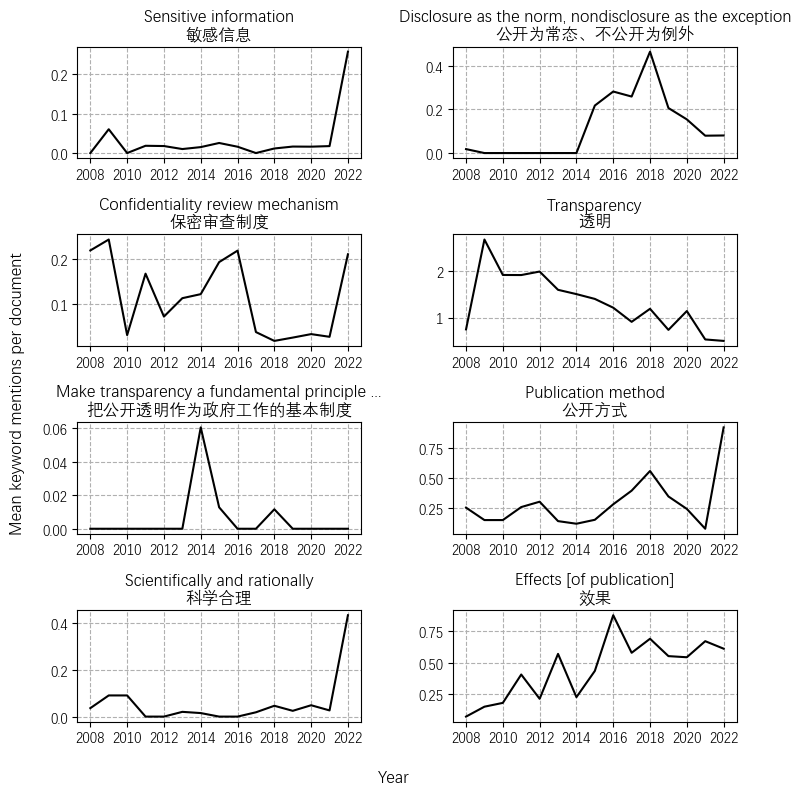

In [2]:
# keywords to search & translations for labels
keywords = ["敏感信息", "公开为常态、不公开为例外", "保密审查制度", "透明", "把公开透明作为政府工作的基本制度", "公开方式",
           "科学合理", "效果"]
keywords_with_translation = ["Sensitive information\n敏感信息",
                            "Disclosure as the norm, nondisclosure as the exception\n公开为常态、不公开为例外",
                            "Confidentiality review mechanism\n保密审查制度",
                            "Transparency\n透明",
                            "Make transparency a fundamental principle ...\n把公开透明作为政府工作的基本制度",
                            "Publication method\n公开方式",
                            "Scientifically and rationally\n科学合理",
                            "Effects [of publication]\n效果"]

# matplotlib subplot settings and labels
num_rows = math.ceil(len(keywords)/2)
fig, axs = plt.subplots(num_rows, 2)
fig.tight_layout(pad=3.5)
fig.supxlabel("Year")
fig.supylabel("Mean keyword mentions per document")

# iterate through keywords
for i in range(len(keywords)): 
    # create empty dataframe
    df_results = pd.DataFrame()
    keyword = keywords[i]
    avg_keyword_counts_per_doc = []
    # iterate through each year
    for year in range(2008, 2023):
        count = 0
        # select slice of dataframe corresponding to the year
        dfy = df.loc[df["Year"].astype(int) == year].reset_index(drop=True)
        # iterate throguh each document
        for text in dfy["Body"].astype(str):
            # count number of keyword occurance per document
            count += text.count(keyword)
        # take average per document by dividing total count by # of documents
        avg_per_doc = count / len(dfy)
        # append to list
        avg_keyword_counts_per_doc.append(avg_per_doc)
    df_results[keyword] = avg_keyword_counts_per_doc
    df_results["Year"] =  range(2008, 2023)
    df_results.set_index("Year", inplace=True)
    
    # plot to subplot
    if i % 2 == 0:
        column_no = 0
    else:
        column_no = 1
        
    row_no = math.floor(i/2)
    
    axs[row_no, column_no].plot(df_results, color='black')
    axs[row_no, column_no].set_title(keywords_with_translation[i])
    axs[row_no, column_no].grid(linestyle="dashed")
    axs[row_no, column_no].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('Fig_1.png', dpi=600)